In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# DBSCAN 

- 밀도 기반의 대표적인 알고리즘
- 간단하고 직관적인 알고리즘으로 돼있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 셋에도 효과적인 군집화가 가능하다.
- 특정 공간 내에 데이터 밀도 차이를 기반알고리즘으로 하고 있어서 복잡한 기하하적 분포도를 가진 데이터 셋에 대해서도 군집화를 잘 수행한다.


<img src='https://t1.daumcdn.net/cfile/tistory/993AD64B5F4356EA22' width=400>


<img src='https://t1.daumcdn.net/cfile/tistory/9914FB3C5F4357281A' width=250>

- 점을 중심으로 epsilon 반경내에 minPts 이상수의 점이 있으면 그 점을 중심으로 군집이 되고 그 점을 core point라고 한다.Core point 가 서로 다른 core point의 군집의 일부가 되면 그 군집을 서로 연결되어 있다고 하고 하나의 군집으로 연결을 한다.군집에는 속하지만, 스스로 core point가 안되는 점을 border point라고 하고, 주로 클러스터의 외곽을 이루는 점이 된다.

# DBSCAN  – 붓꽃 데이터 셋

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df['target'] = iris.target
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,target
103,6.3,2.9,5.6,1.8,2
120,6.9,3.2,5.7,2.3,2
39,5.1,3.4,1.5,0.2,0
61,5.9,3.0,4.2,1.5,1
34,4.9,3.1,1.5,0.2,0


###  DBSCAN 군집화 적용


- eps : 입실론 주변 영역(epsilon).개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- min_samples : 최소 데이터 개수(min points).개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

```
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
```

In [4]:
#관련 메서드 임포트
from sklearn.cluster import DBSCAN

#군집 모델 생성 및 적용 -> 군집라벨(모델명.fit_predict(X))
#eps 값이 줄어들면 노이즈 포인트가 늘어남
dbscan = DBSCAN(eps=0.6, min_samples=12)
dbscan_labels = dbscan.fit_predict(iris.data)

#데이터프레임 추가
iris_df['dbscan_cluster'] = dbscan_labels

#결과 확인
iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
#-1 -> 노이즈 포인트
#KMeans보다는 좀 떨어짐

target  dbscan_cluster
0        0                48
        -1                 2
1        1                46
        -1                 4
2        1                38
        -1                12
Name: dbscan_cluster, dtype: int64


In [5]:
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
48,5.3,3.7,1.5,0.2,0,0
45,4.8,3.0,1.4,0.3,0,0
140,6.7,3.1,5.6,2.4,2,1
59,5.2,2.7,3.9,1.4,1,1
44,5.1,3.8,1.9,0.4,0,0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris_scaled = StandardScaler().fit_transform(iris.data)
pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(iris_scaled)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]

Text(3, 0.5, '1')

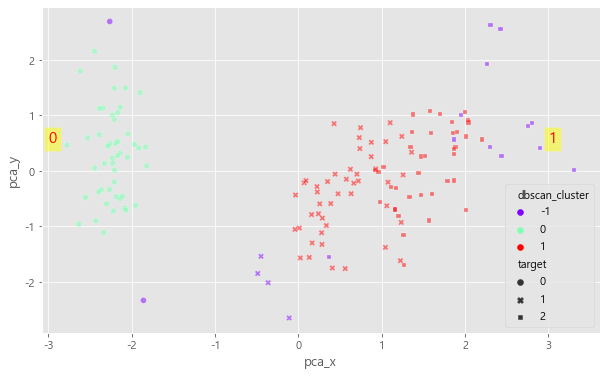

In [7]:
sns.color_palette("Paired")
sns.scatterplot(x='pca_x', y='pca_y', data=iris_df, hue='dbscan_cluster', \
                style='target', palette='rainbow', alpha=0.5 )

#그래프 위에 글자 표시
plt.text(x=-3,
         y=0.5,
         s='0',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))


plt.text(x=3,
         y=0.5,
         s='1',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))


###  eps의 크기를 증가 한 후 노이즈 확인


In [8]:
from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


Text(3, 0.5, '1')

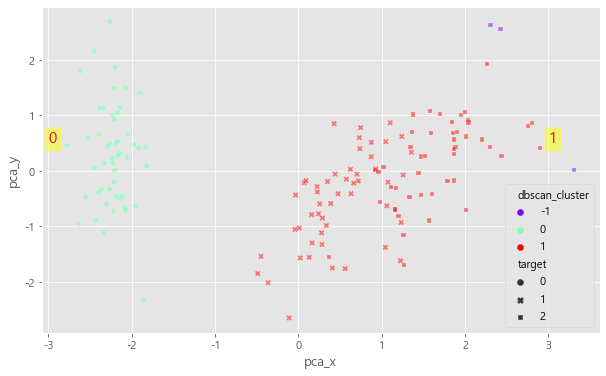

In [9]:
sns.color_palette("Paired")
sns.scatterplot(x='pca_x', y='pca_y', data=iris_df, hue='dbscan_cluster', \
                    style='target', palette='rainbow', alpha=0.5 )
plt.text(x=-3,
         y=0.5,
         s='0',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))


plt.text(x=3,
         y=0.5,
         s='1',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))

### min_samples의 크기를 증가 후 노이즈 확인

- min_samples 값을 늘리면 노이즈는 증가한다

In [10]:
from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


Text(3, 0.5, '1')

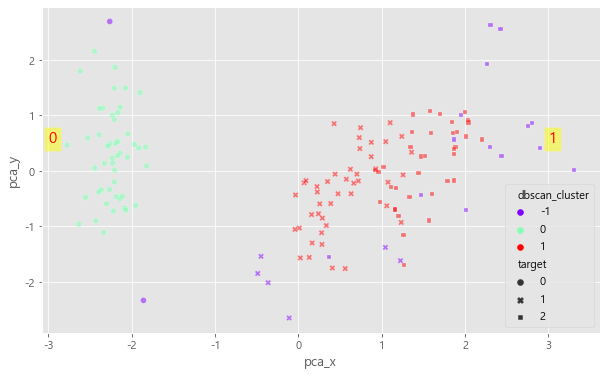

In [11]:
sns.color_palette("Paired")
sns.scatterplot(x='pca_x', y='pca_y', data=iris_df, hue='dbscan_cluster', \
                    style='target', palette='rainbow', alpha=0.5 )

plt.text(x=-3,
         y=0.5,
         s='0',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))


plt.text(x=3,
         y=0.5,
         s='1',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))

# DBSCAN 적용 – make_circles() 데이터 세트

In [16]:
#샘플 데이터셋 make_circles -> 타원형태
from sklearn.datasets import make_circles

#factor 값이 늘어나면 바깥원과의 거리가 가까워짐
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
# X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.7)

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

cluster_df.sample(3)

,ftr1,ftr2,target
489,0.481531,0.007662,1
193,0.950633,0.111248,0
11,0.380484,0.372430,1


<AxesSubplot:xlabel='ftr1', ylabel='ftr2'>

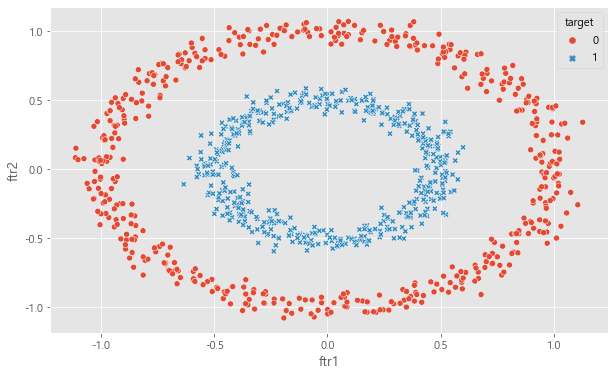

In [17]:
sns.color_palette("GnBu")
sns.scatterplot(x='ftr1', y='ftr2', data=cluster_df, hue='target', \
                    style='target' )


In [18]:
# from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
cluster_df['dbscan_cluster'] = dbscan_labels

cluster_df.sample(5)

,ftr1,ftr2,target,dbscan_cluster
608,-0.269280,0.495724,1,0
846,0.920959,0.473317,0,1
839,0.537082,0.904511,0,1
813,0.840283,-0.607865,0,1
874,0.165343,-1.035941,0,1


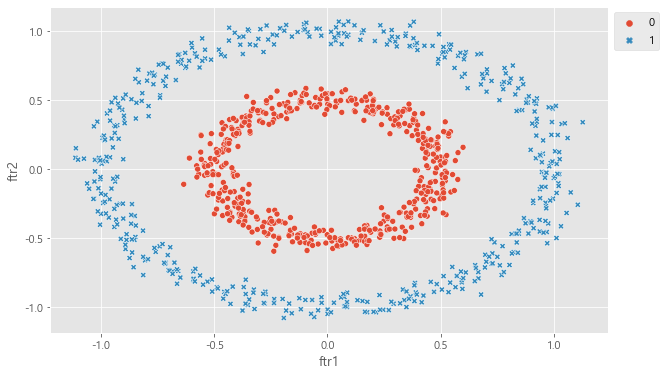

In [20]:
# hue='dbscan_cluster', style='dbscan_cluster'
sns.color_palette("GnBu")
sns.scatterplot(x='ftr1', y='ftr2', data=cluster_df, hue='dbscan_cluster', \
                    style='dbscan_cluster' )
plt.legend(loc = 2, bbox_to_anchor = (1,1))

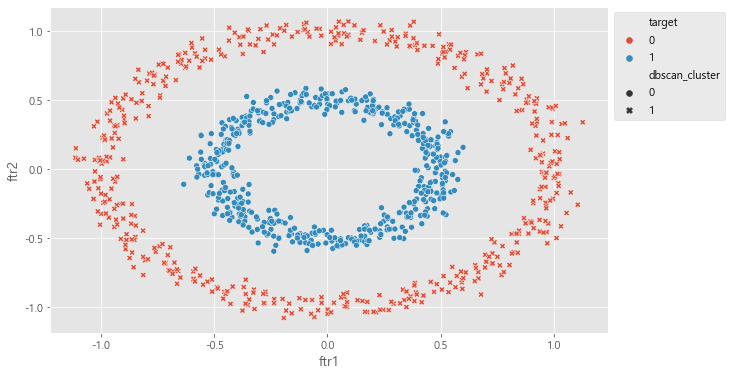

In [21]:
# hue='target', style='dbscan_cluster'
sns.color_palette("GnBu")
sns.scatterplot(x='ftr1', y='ftr2', data=cluster_df, hue='target', \
                    style='dbscan_cluster' )
plt.legend(loc = 2, bbox_to_anchor = (1,1))

#### KMeans 모델과 비교

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
cluster_df['kmeans_cluster'] = kmeans_labels

cluster_df.sample(5)

,ftr1,ftr2,target,dbscan_cluster,kmeans_cluster
672,0.907404,-0.230203,0,1,0
906,-0.002819,0.431140,1,0,1
868,0.487814,0.150313,1,0,1
319,0.863762,0.615305,0,1,1
158,-0.072069,-0.516930,1,0,0


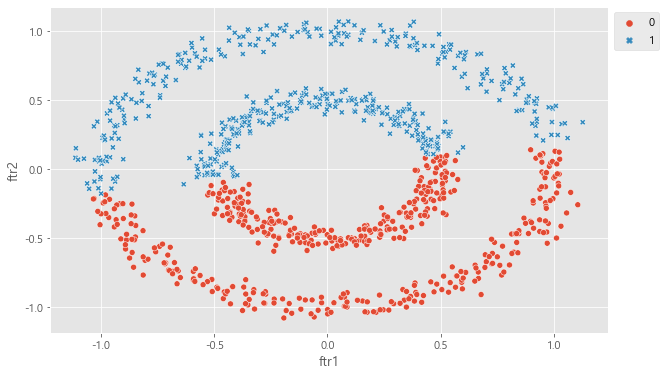

In [23]:
sns.color_palette("GnBu")
sns.scatterplot(x='ftr1', y='ftr2', data=cluster_df, hue='kmeans_cluster', \
                    style='kmeans_cluster' )
plt.legend(loc = 2, bbox_to_anchor = (1,1))

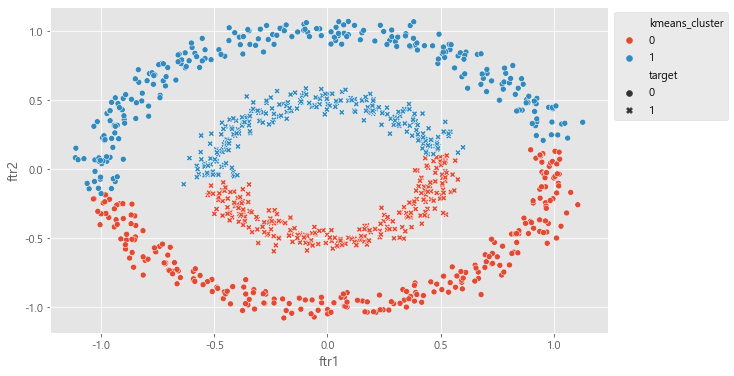

In [24]:
#kmeans cluster + target
sns.color_palette("GnBu")
sns.scatterplot(x='ftr1', y='ftr2', data=cluster_df, hue='kmeans_cluster', \
                    style='target' )
plt.legend(loc = 2, bbox_to_anchor = (1,1))